In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

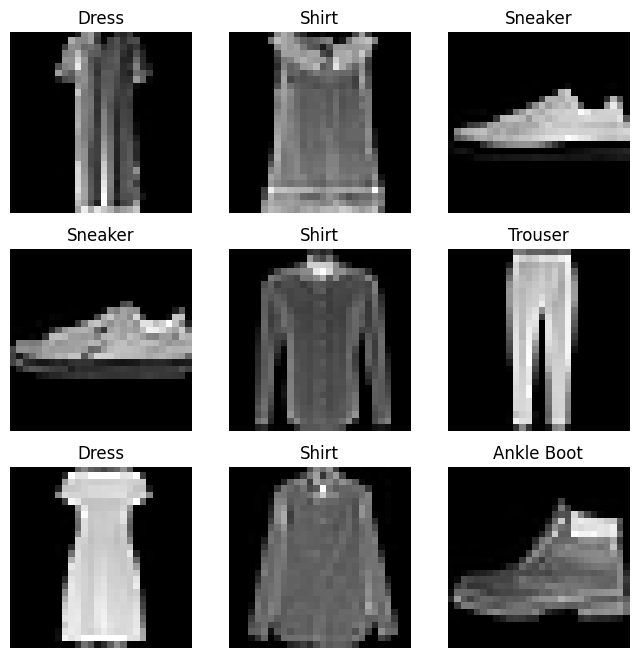

In [3]:
labels_map={
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}
figure=plt.figure(figsize=(8,8))
cols,rows=3,3,
for i in range(1,cols*rows+1):
    sample_idx=torch.randint(len(training_data),size=(1,)).item()
    img,label=training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

In [5]:
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
        self.img_labels=pd.read.csv(annotations_file)
        self.img_dir=img_dir
        self.transform=transform
        self.target_transform=target_transform
        
    def __len__(self):
        return len(self_img_labels)
    
    def __getitem__(self,idx):
        img_path=os.path.join(selg.img_dir,self.img_labels.iloc[idx,0])
        image=read_image(img_path)
        label=self.img_labels.iloc[idx,1]
        if self.transform:
            image=self.transform(image)
        if self.target_transform:
            label=self.target_transform(label)
        return image,label

In [6]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


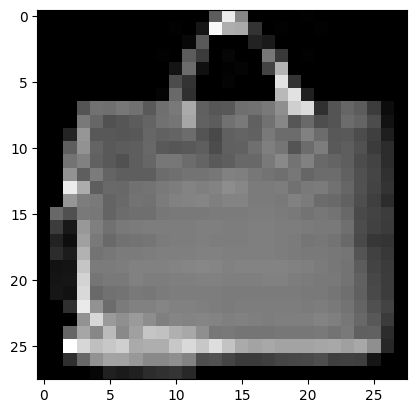

Label:8


In [7]:
train_features,train_labels=next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.size()}")
img=train_features[0].squeeze()
label=train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(f"Label:{label}")